# Predicting Tomorrow's SP500 Close with Prophet Machine Learning


In this experiment, I will be attempting to build a model that accurately predicts the closing price of the SP500 for tomorrow. This means that you can run the model after the market closes today and have an understanding as to what to expect for the following day. 

I will be using Facebook's Prophet Machine Learning Algorithm to train market data that spans back to 1992 for the open, high, low, close, adj close of the following assets:

- SP500
- VIX Index
- 5 yr Treasury Note
- 10 yr Treasury Bond
- 30 yr Treasury Bond

I will be diagnosing the performance of the model with Cross Validation and predominantly considering the Root Mean Squared Error as my metric of measurement (rmse).

Procedure used without predictors:
1. Retreive Data
2. Clean and Format Data for Machine Learning
3. Fit Model
4. Measure Error Metrics with Test rmse and CV rmse

Procedure used with predictors:
1. Retreive Data
2. Clean and Format Data for Machine Learning
3. Define Predictors
3. Fit Model with predictors
4. Measure Error Metrics with Test rmse and CV rmse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('clean_historical_data.csv')

In [3]:
df.columns

Index(['Date', 'Adj Close_FVX', 'Adj Close_GSPC', 'Adj Close_TNX',
       'Adj Close_TYX', 'Adj Close_VIX', 'Close_FVX', 'Close_GSPC',
       'Close_TNX', 'Close_TYX', 'Close_VIX', 'High_FVX', 'High_GSPC',
       'High_TNX', 'High_TYX', 'High_VIX', 'Low_FVX', 'Low_GSPC', 'Low_TNX',
       'Low_TYX', 'Low_VIX', 'Open_FVX', 'Open_GSPC', 'Open_TNX', 'Open_TYX',
       'Open_VIX', 'Volume_GSPC'],
      dtype='object')

In [4]:
df['ds'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z').apply(lambda x: x.strftime('%Y-%m-%d'))

In [5]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')

In [6]:
df.Volume_GSPC = df.Volume_GSPC.astype(float)

## Target Definition: 

Target: We want to predict the closing price of the SPX tomorrow

In [7]:
df['y'] = df['Adj Close_GSPC'].shift(-1)

In [8]:
df.tail()

,Date,Adj Close_FVX,Adj Close_GSPC,Adj Close_TNX,Adj Close_TYX,Adj Close_VIX,Close_FVX,Close_GSPC,Close_TNX,Close_TYX,...,Low_TYX,Low_VIX,Open_FVX,Open_GSPC,Open_TNX,Open_TYX,Open_VIX,Volume_GSPC,ds,y
8353,2023-04-14 00:00:00-04:00,3.611,4137.640137,3.522,3.739,17.070000,3.611,4137.640137,3.522,3.739,...,3.694,17.07,3.504,4140.109863,3.454,3.702,17.940001,3.575690e+09,2023-04-14,4151.319824
8354,2023-04-17 00:00:00-04:00,3.693,4151.319824,3.591,3.805,16.950001,3.693,4151.319824,3.591,3.805,...,3.756,16.90,3.647,4137.169922,3.549,3.764,17.580000,3.611180e+09,2023-04-17,4154.870117
8355,2023-04-18 00:00:00-04:00,3.675,4154.870117,3.572,3.787,16.830000,3.675,4154.870117,3.572,3.787,...,3.769,16.58,3.677,4164.259766,3.578,3.790,16.940001,3.536640e+09,2023-04-18,4154.520020
8356,2023-04-19 00:00:00-04:00,3.722,4154.520020,3.602,3.789,16.459999,3.722,4154.520020,3.602,3.789,...,3.788,16.17,3.749,4139.330078,3.635,3.831,17.299999,3.572560e+09,2023-04-19,4129.790039
8357,2023-04-20 00:00:00-04:00,3.640,4129.790039,3.545,3.753,17.170000,3.640,4129.790039,3.545,3.753,...,3.730,16.33,3.668,4130.479980,3.566,3.765,16.850000,3.772080e+09,2023-04-20,NaN


In [9]:
df = df.drop(df.index[-1])

In [10]:
df.apply(pd.isnull).sum()

Date              0
Adj Close_FVX     0
Adj Close_GSPC    0
Adj Close_TNX     0
Adj Close_TYX     0
Adj Close_VIX     0
Close_FVX         0
Close_GSPC        0
Close_TNX         0
Close_TYX         0
Close_VIX         0
High_FVX          0
High_GSPC         0
High_TNX          0
High_TYX          0
High_VIX          0
Low_FVX           0
Low_GSPC          0
Low_TNX           0
Low_TYX           0
Low_VIX           0
Open_FVX          0
Open_GSPC         0
Open_TNX          0
Open_TYX          0
Open_VIX          0
Volume_GSPC       0
ds                0
y                 0
dtype: int64

# Reviewing: Train / Test Split

In [11]:
split_date = '2022-01-01'
train = df.loc[df.ds <= split_date].copy()
test = df.loc[df.ds >= split_date].copy()

<AxesSubplot:xlabel='ds'>

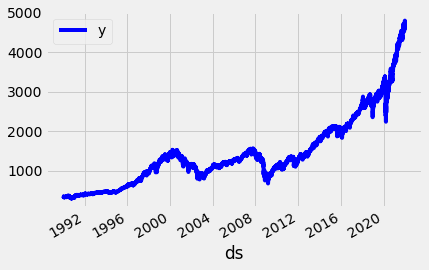

In [12]:
train.plot(x='ds',y='y',color='blue')

<AxesSubplot:xlabel='ds'>

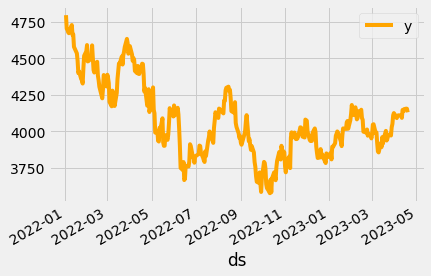

In [13]:
test.plot(x='ds',y='y',color='orange')

# Entering Prophet Model

In [14]:
from prophet import Prophet

model = Prophet()
model.fit(train)

13:37:43 - cmdstanpy - INFO - Chain [1] start processing
13:37:49 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
test_forecast = model.predict(test)

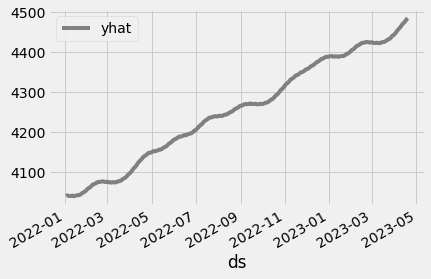

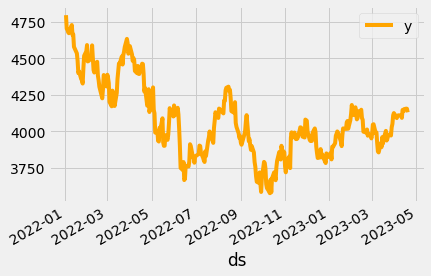

In [16]:
test_forecast.plot(x='ds',y='yhat',color='grey')
test.plot(x='ds',y='y',color='orange')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print('Length of Train:', len(train), ' Days')
print('Length of Test:', len(test), ' Days')
print('RMSE:', rmse)

Length of Train: 8032  Days
Length of Test: 325  Days
RMSE: 393.2793015324794


thats pretty shite haha

# Measuring Error Metrics

In [17]:
from prophet.diagnostics import cross_validation, performance_metrics

In [18]:
df = df.drop(columns='Date')

### Important:

1. Need to include Days in the 3 parameters or else it wont work.
2. initial: The size of the initial training period used to fit the model. This is the earliest time point in the data that the model is trained on.
3. period: The spacing between cutoff dates used in the rolling window approach to cross-validation. For example, if period=180 days, there will be a cutoff date every 180 days in the dataset.
4. horizon: The length of the forecast horizon for each cutoff. This is the length of time into the future that the model is asked to make predictions for.

In [23]:
model = Prophet()
m = model.fit(df)
cv = cross_validation(m, initial='730 days', horizon='365 days', period='180 days')
cv.head()

13:44:57 - cmdstanpy - INFO - Chain [1] start processing
13:45:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/62 [00:00<?, ?it/s]

13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:06 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:08 - cmdstanpy - INFO - Chain [1] start processing
13:45:08 - cmdstanpy - INFO - Chain [1] done processing
13:45:08 - cmdstanpy - INFO - Chain [1] start processing
13:45:09 - cmdstanpy - INFO - Chain [1] done processing
13:45:09 - cmdstanpy - INFO - Chain [1] start processing
13:45:09 - cmdstanpy - INFO - Chain [1] done processing
13:45:10 - cmdstanpy - INFO - Chain [1] start processing
13:45:10 - cmdstanpy - INFO - Chain [1] done processing
13:45:10 - cmdstanpy - INFO - Chain [1] start processing
13:45:11 - cmdstanpy - INFO - Chain [1] done processing
13:45:12 - cmdstanpy - INFO - Chain [1] start processing
13:45:12 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1992-03-30,408.666871,400.351094,417.055998,403.690002,1992-03-27
1,1992-03-31,409.168313,400.115728,417.777035,404.230011,1992-03-27
2,1992-04-01,408.742290,400.435853,417.592991,400.500000,1992-03-27
3,1992-04-02,408.572760,399.891662,417.214283,401.549988,1992-03-27
4,1992-04-03,408.656861,399.975568,417.058461,405.589996,1992-03-27


In [24]:
df_p = performance_metrics(cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,37499.435105,193.647709,122.862535,0.079894,0.052692,0.079380,0.323765
1,38 days,37882.266089,194.633672,123.830699,0.080523,0.053482,0.080040,0.320168
2,39 days,38573.454589,196.401259,125.269663,0.081322,0.054018,0.080862,0.316184
3,40 days,38968.584488,197.404621,126.065435,0.081863,0.054324,0.081359,0.312258
4,41 days,39116.243442,197.778268,126.580110,0.082200,0.054543,0.081700,0.310319
...,...,...,...,...,...,...,...,...
324,361 days,109498.383806,330.905400,237.259165,0.159931,0.113776,0.160352,0.325968
325,362 days,109225.612969,330.492985,236.908143,0.159831,0.111578,0.160214,0.325447
326,363 days,109743.860546,331.276109,237.528189,0.160426,0.113776,0.160638,0.325806
327,364 days,110793.974677,332.857289,238.426637,0.160803,0.113776,0.161125,0.326030


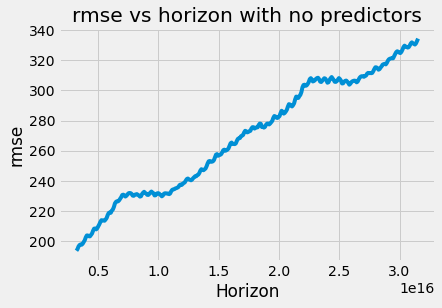

In [49]:
plt.plot(df_p['horizon'],df_p['rmse'])
plt.xlabel('Horizon')
plt.ylabel('rmse')
plt.title('rmse vs horizon with no predictors')
plt.show()

In [50]:
print('CV metrics: initial=730 days, horizon=365 days, period=180 days')

CV metrics: initial=730 days, horizon=365 days, period=180 days


# Adding the Predictors

In [53]:
predictors = df.columns[~df.columns.isin(['y','ds'])]

In [54]:
# Fit initial prophet model
from prophet import Prophet

def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

m = fit_prophet(train)

14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
predictors_forecast = m.predict(test)

In [59]:
predictors_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Adj Close_FVX,Adj Close_FVX_lower,Adj Close_FVX_upper,Adj Close_GSPC,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,1270.842262,4767.651125,4814.936425,1270.842262,1270.842262,-39.379374,-39.379374,-39.379374,1042.795385,...,176.187516,176.187516,176.187516,0.870817,0.870817,0.870817,0.0,0.0,0.0,4790.834798
1,2022-01-04,1270.850741,4770.754179,4818.468073,1270.850741,1270.850741,-39.213790,-39.213790,-39.213790,1041.861498,...,175.939338,175.939338,175.939338,0.783838,0.783838,0.783838,0.0,0.0,0.0,4794.723160
2,2022-01-05,1270.859220,4689.474450,4733.537798,1270.859220,1270.859220,-38.253402,-38.253402,-38.253402,1013.115295,...,175.751989,175.751989,175.751989,0.680786,0.680786,0.680786,0.0,0.0,0.0,4711.981877
3,2022-01-06,1270.867699,4672.591630,4718.210740,1270.867699,1270.867699,-37.524830,-37.524830,-37.524830,1011.714390,...,175.815511,175.815511,175.815511,0.564026,0.564026,0.564026,0.0,0.0,0.0,4695.743077
4,2022-01-07,1270.876179,4655.906243,4703.119044,1270.876179,1270.876179,-37.061195,-37.061195,-37.061195,1005.832789,...,175.699848,175.699848,175.699848,0.436352,0.436352,0.436352,0.0,0.0,0.0,4678.858431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2023-04-13,1274.785040,4125.568891,4171.337179,1272.514925,1277.463018,-3.911224,-3.911224,-3.911224,841.689441,...,175.815511,175.815511,175.815511,1.602465,1.602465,1.602465,0.0,0.0,0.0,4147.300139
321,2023-04-14,1274.793520,4117.755390,4166.628902,1272.510391,1277.486952,-2.189146,-2.189146,-2.189146,839.036205,...,175.699848,175.699848,175.699848,1.653940,1.653940,1.653940,0.0,0.0,0.0,4143.002729
322,2023-04-17,1274.818957,4127.957412,4176.286762,1272.525886,1277.527844,-0.831355,-0.831355,-0.831355,843.266403,...,176.187516,176.187516,176.187516,1.748812,1.748812,1.748812,0.0,0.0,0.0,4153.474406
323,2023-04-18,1274.827436,4136.998289,4185.963805,1272.525202,1277.557932,-1.129408,-1.129408,-1.129408,844.364268,...,175.939338,175.939338,175.939338,1.752991,1.752991,1.752991,0.0,0.0,0.0,4161.235613


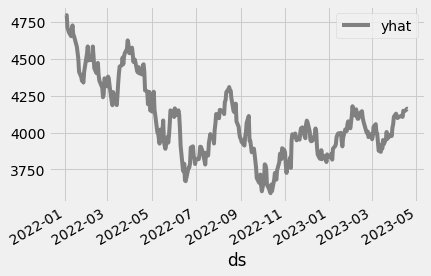

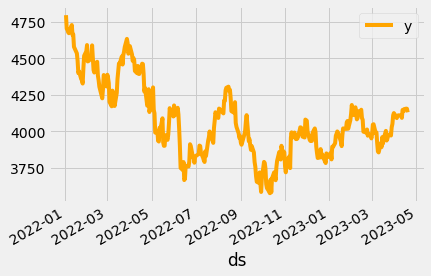

In [60]:
predictors_forecast.plot(x='ds',y='yhat',color='grey')
test.plot(x='ds',y='y',color='orange')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'], predictors_forecast['yhat']))
print('Length of Train:', len(train), ' Days')
print('Length of Test:', len(test), ' Days')
print('RMSE:', rmse)

Length of Train: 8032  Days
Length of Test: 325  Days
RMSE: 57.46596080834261


In [62]:
cv = cross_validation(m, initial='730 days', horizon='365 days', period='180 days')
cv.head()

  0%|          | 0/59 [00:00<?, ?it/s]

14:41:22 - cmdstanpy - INFO - Chain [1] start processing
14:41:22 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
14:41:24 - cmdstanpy - INFO - Chain [1] done processing
14:41:25 - cmdstanpy - INFO - Chain [1] start processing
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
14:41:26 - cmdstanpy - INFO - Chain [1] start processing
14:41:27 - cmdstanpy - INFO - Chain [1] done processing
14:41:27 - cmdstanpy - INFO - Chain [1] start processing
14:41:28 - cmdstanpy - INFO - Chain [1] done processing
14:41:28 - cmdstanpy - INFO - Chain [1] start processing
14:41:29 - cmdstanpy - INFO - Chain [1] done processing
14:41:30 - cmdstanpy - INFO - Chain [1] start processing
14:41:31 - cmdstanpy - INFO - Chain [1] done processing
14:41:31 - cmdstanpy - INFO - Chain [1] start processing
14:41:33 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1992-06-02,414.229101,410.256680,417.968151,414.589996,1992-06-01
1,1992-06-03,414.979803,411.274353,418.865766,413.260010,1992-06-01
2,1992-06-04,412.981455,409.243710,416.973428,413.480011,1992-06-01
3,1992-06-05,412.696572,408.714910,416.824745,413.359985,1992-06-01
4,1992-06-08,412.176414,408.215263,416.078526,410.059998,1992-06-01


In [63]:
predictors_p = performance_metrics(cv)

In [64]:
predictors_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,292.738154,17.109592,10.881398,0.007806,0.005409,0.007809,0.679527
1,38 days,293.010968,17.117563,10.888449,0.007791,0.005351,0.007794,0.679153
2,39 days,299.291445,17.300042,10.928675,0.007847,0.005351,0.007845,0.678972
3,40 days,297.864521,17.258752,10.898109,0.007826,0.005342,0.007823,0.679433
4,41 days,293.709820,17.137964,10.809369,0.007747,0.005350,0.007742,0.684234
...,...,...,...,...,...,...,...,...
324,361 days,403.327706,20.083020,13.316908,0.009782,0.006660,0.009758,0.606445
325,362 days,403.181128,20.079371,13.311072,0.009756,0.006716,0.009734,0.604478
326,363 days,401.748671,20.043669,13.271526,0.009741,0.006646,0.009719,0.605355
327,364 days,398.986968,19.974658,13.238602,0.009718,0.006532,0.009698,0.610031


Wow, much better. Let's see what is helping the most

In [74]:
from prophet.utilities import regressor_coefficients

reg_coef = regressor_coefficients(m)

In [79]:
reg_coef = reg_coef.sort_values(by='center',ascending=False)
reg_coef

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
25,Volume_GSPC,additive,2.349820e+09,-1.064078e-09,-1.064078e-09,-1.064078e-09
11,High_GSPC,additive,1.432231e+03,2.086369e-01,2.086369e-01,2.086369e-01
6,Close_GSPC,additive,1.424350e+03,3.092321e-01,3.092321e-01,3.092321e-01
1,Adj Close_GSPC,additive,1.424350e+03,3.092321e-01,3.092321e-01,3.092321e-01
21,Open_GSPC,additive,1.424027e+03,-1.225900e-01,-1.225900e-01,-1.225900e-01
16,Low_GSPC,additive,1.415265e+03,2.890276e-01,2.890276e-01,2.890276e-01
14,High_VIX,additive,2.035251e+01,1.323814e+00,1.323814e+00,1.323814e+00
24,Open_VIX,additive,1.955964e+01,-9.895358e-01,-9.895358e-01,-9.895358e-01
4,Adj Close_VIX,additive,1.948250e+01,-3.135172e-01,-3.135172e-01,-3.135172e-01
9,Close_VIX,additive,1.948250e+01,-3.135172e-01,-3.135172e-01,-3.135172e-01


What this is saying that the Volume of today, high of today, close of today, open of today, low of today are the most important values in predicting tomorrows adj close

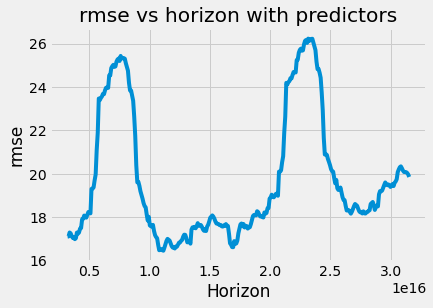

In [80]:
plt.plot(predictors_p['horizon'],predictors_p['rmse'])
plt.xlabel('Horizon')
plt.ylabel('rmse')
plt.title('rmse vs horizon with predictors')
plt.show()

# Conclusion:

The model performed much better whilst utilizing the predictors, finding that the SPX, VIX, and 30 yr Treasury had the most importance when predicting the close. 

RMSE without predictors for Cross Validation for 37 day projection: 193
RMSE with predictors for Cross Validation for 37 day projection: 17

RMSE without predictors for test window of 2022-01-01 to 2022-04-20: 393
RMSE with predictors for test window of 2022-01-01 to 2022-04-20: 57

# Next Steps:

To further improve the accuracy and lower the RMSE, i will implement the following:

1. Look at days the predictions were the worst and consider deleting them from the training dataset.
2. Create hyper-predictors, such as moving averages or exponential moving averages on existing data.
3. Make a new model that takes all of todays data along with the open values of tomorrow (would run the model day of after the open rather than night before).
4. Create datetime lag predictors to see if that helps.
5. Add more assets.